In [58]:
import os
import yaml
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy
from sklearn.cluster import KMeans
import pickle
%matplotlib inline

In [59]:
def element_entropy(C):
    E = np.empty_like(C)
    rows, cols = E.shape
    for row in range(rows):
        for col in range(cols):
            p = C[row,col]
            if p > 0:
                E[row,col] = -p * math.log(p, 2)
            else:
                E[row,col] = 0
    entrop = np.mean(E, axis=1)
    return entrop

In [60]:
entropies_dict = {}
for alg_num, alg in enumerate(['Louvain', 'Infomap', 'LPA']):
    for mu in [1, 15, 2, 25, 3, 35, 4]:
        coassociation_matrices = []
        for j in [1, 2, 3, 4, 5]:
            coassociation_fil = '../LFR_Graph_Data/1000_Node/Community_Data/{2}/Coassociation/graph_0{1}_mu_0_{0}_coassociation.npy'.format(mu, j, alg)
            x = np.load(coassociation_fil)
            coassociation_matrices.append(x)
        entropies = [element_entropy(C) for C in coassociation_matrices]
        x = np.concatenate(entropies)
        entropies_dict[alg + '_mu_' + str(mu)] = x
    C = np.load('6-email-eu-core/' + alg + '/coassociation.npy')
    entropies = element_entropy(C)
    node_entropies = list(entropies)
    node_entropies = np.array(node_entropies)
    entropies_dict[alg + '_email'] = node_entropies

In [61]:
kmeans_cutoffs = {}
for title, entrops in entropies_dict.items():
    kmeans = KMeans(n_clusters=2).fit(entrops.reshape(-1,1))
    kmeans_cutoffs[title] = np.mean(kmeans.cluster_centers_)

/home/sophie/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/sophie/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/sophie/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/sophie/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2

In [62]:
median_cutoffs = {}
for title, entrops in entropies_dict.items():
    median_cutoffs[title] = np.median(entrops)

In [63]:
modularities = pickle.load(open('../modularities', 'rb'))
print(modularities)

{'Louvain_mu_0_1': 0.6941487433314519, 'Louvain_mu_0_15': 0.6062023756027013, 'Louvain_mu_0_2': 0.5327415977211956, 'Louvain_mu_0_25': 0.4783819226049455, 'Louvain_mu_0_3': 0.40175272896618, 'Louvain_mu_0_35': 0.3457844161348528, 'Louvain_mu_0_4': 0.2925692337714083, 'Louvain_email_eu_core': 0.43065868718804845, 'Infomap_mu_0_1': 0.6941567568471861, 'Infomap_mu_0_15': 0.6062023756027013, 'Infomap_mu_0_2': 0.5327722257767757, 'Infomap_mu_0_25': 0.4782243938257613, 'Infomap_mu_0_3': 0.3364336020612933, 'Infomap_mu_0_35': 0.0672075322538828, 'Infomap_mu_0_4': 0.0, 'Infomap_email_eu_core': 0.3880165267684059, 'LPA_mu_0_1': 0.693495324282302, 'LPA_mu_0_15': 0.5996687246214276, 'LPA_mu_0_2': 0.4954020410872079, 'LPA_mu_0_25': 0.38685831416764105, 'LPA_mu_0_3': 0.10762553197214801, 'LPA_mu_0_35': 0.012769024822322575, 'LPA_mu_0_4': 0.00010103024183097419, 'LPA_email_eu_core': 0.019975179540011274}


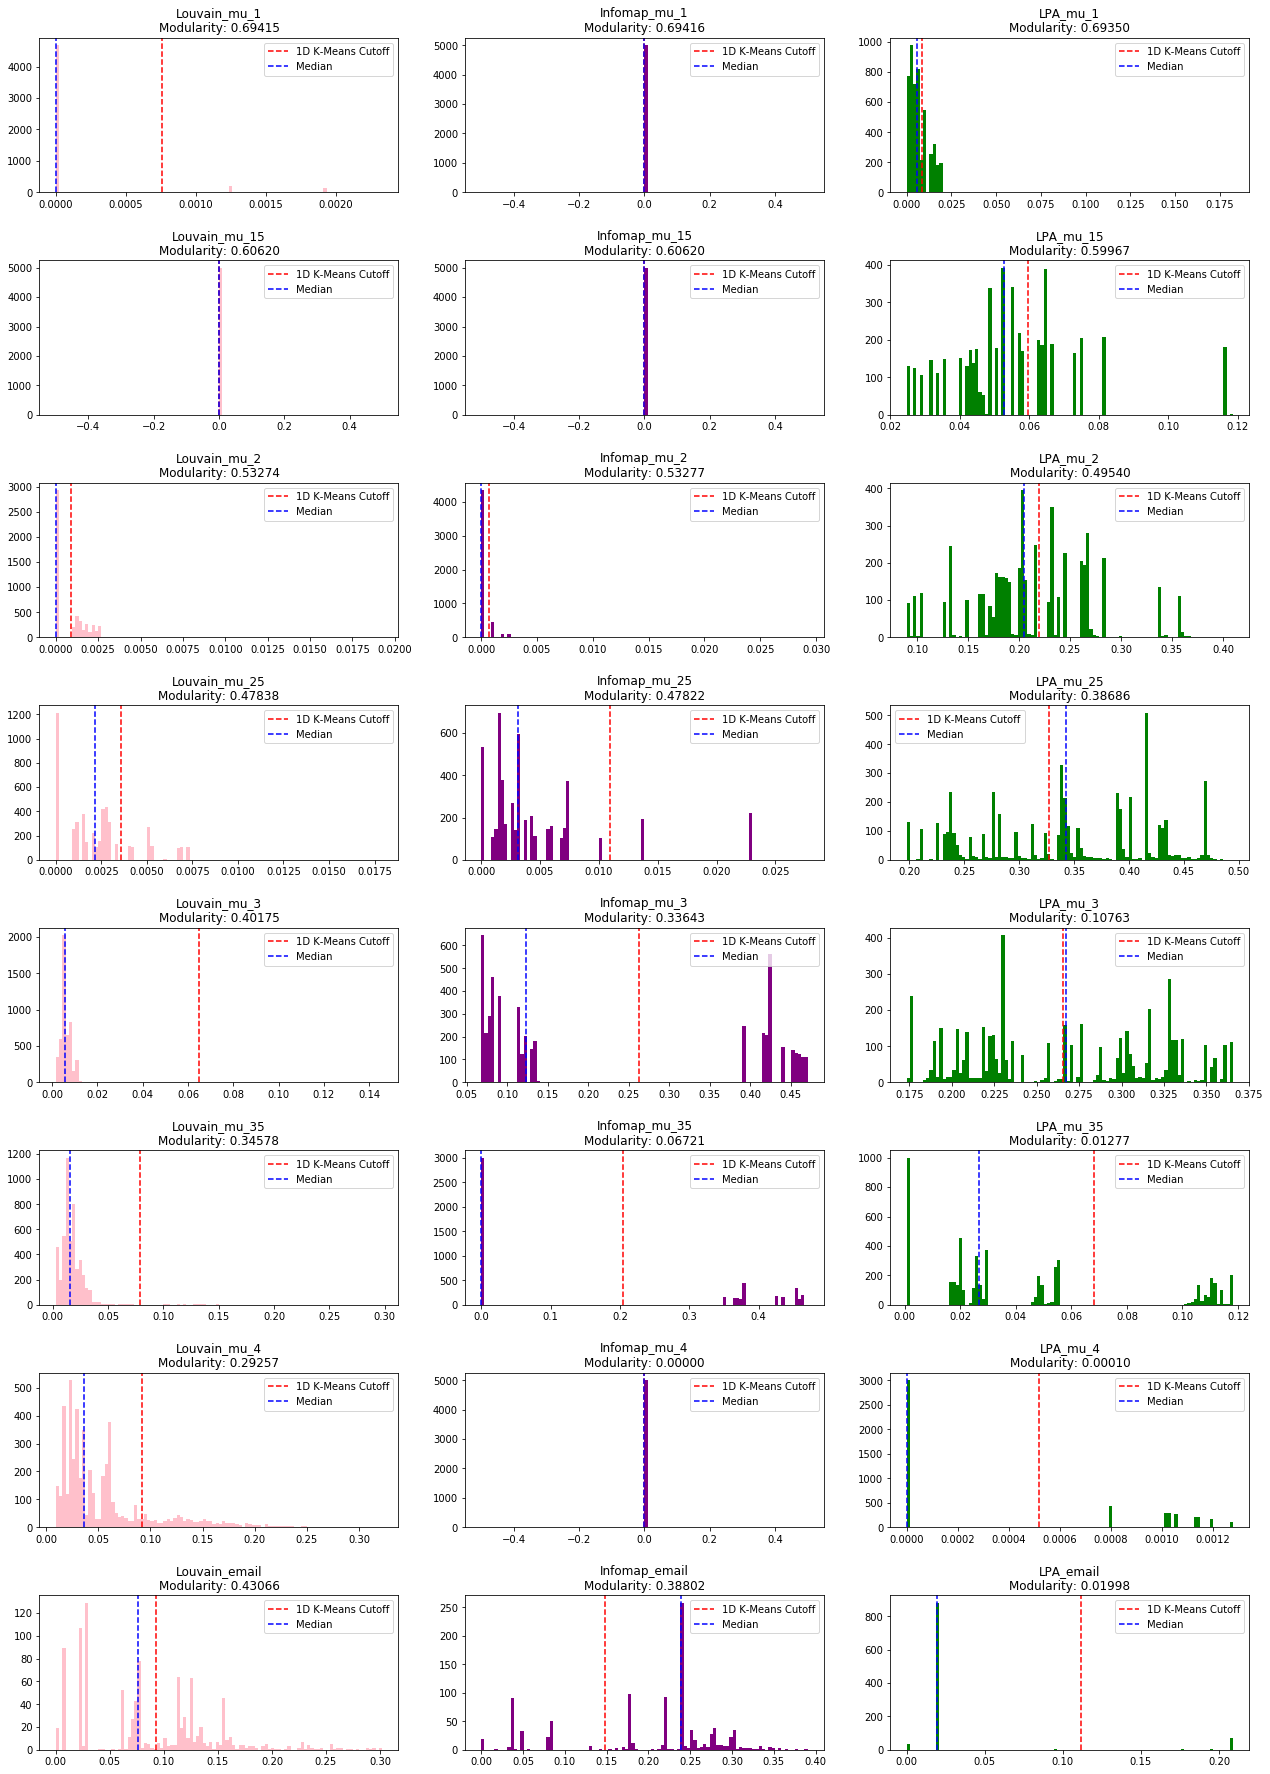

In [66]:
fig = plt.figure(figsize=(18,25))
count = 1
for graph in ['_mu_1', '_mu_15', '_mu_2', '_mu_25', '_mu_3', '_mu_35', '_mu_4', '_email']:
    for alg in ['Louvain', 'Infomap', 'LPA']:
        title = alg + graph
        ax = fig.add_subplot(8,3,count)
        if 'Louvain' in title:
            col = 'pink'
        elif 'Infomap' in title:
            col = 'purple'
        elif 'LPA' in title:
            col = 'green'
        if 'email' in title:
            modularity_graph = '_email_eu_core'
        else:
            modularity_graph = graph[0:3] + '_0_' + graph.split('_')[-1]
        modularity_title = 'Modularity: ' + '{:.5f}'.format(modularities[alg + modularity_graph])
        ax.set_title(title + '\n' + modularity_title)
        entrops = entropies_dict[title]
        plt.hist(entrops, bins=100, color=col)
        plt.axvline(x = kmeans_cutoffs[title], c='r', linestyle='--', label='1D K-Means Cutoff')
        plt.axvline(x = median_cutoffs[title], c='b', linestyle='--', label='Median')
        plt.legend()
        count += 1
fig.tight_layout(pad=2)